In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re
import warnings
warnings.filterwarnings('ignore')

In [3]:
df1=pd.read_csv('C:/Users/FixLab/Desktop/project/sms/sms validation/SMS_train (1) (1).csv',encoding='ISO-8859-1')
df2=pd.read_csv('C:/Users/FixLab/Desktop/project/sms/sms validation/SMS_test (2) (1).csv',encoding='ISO=8859-1')

In [4]:
df=pd.concat([df1,df2])
df

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will ü b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam
...,...,...,...
120,121,7 wonders in My WORLD 7th You 6th Ur style 5th...,Non-Spam
121,122,Try to do something dear. You read something f...,Non-Spam
122,123,Sun ah... Thk mayb can if dun have anythin on....,Non-Spam
123,124,"SYMPTOMS when U are in love: ""1.U like listeni...",Non-Spam


In [5]:
df.head()

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will ü b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam


In [6]:
df.tail()

,S. No.,Message_body,Label
120,121,7 wonders in My WORLD 7th You 6th Ur style 5th...,Non-Spam
121,122,Try to do something dear. You read something f...,Non-Spam
122,123,Sun ah... Thk mayb can if dun have anythin on....,Non-Spam
123,124,"SYMPTOMS when U are in love: ""1.U like listeni...",Non-Spam
124,125,Great. Have a safe trip. Dont panic surrender ...,Non-Spam


In [7]:
df.shape

(1082, 3)

In [8]:
df.dtypes

S. No.           int64
Message_body    object
Label           object
dtype: object

In [9]:
df.isna().sum()

S. No.          0
Message_body    0
Label           0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1082 entries, 0 to 124
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   S. No.        1082 non-null   int64 
 1   Message_body  1082 non-null   object
 2   Label         1082 non-null   object
dtypes: int64(1), object(2)
memory usage: 33.8+ KB


In [11]:
df['Label'].unique()

array(['Non-Spam', 'Spam'], dtype=object)

In [12]:
df['Label'].value_counts()

Label
Non-Spam    884
Spam        198
Name: count, dtype: int64

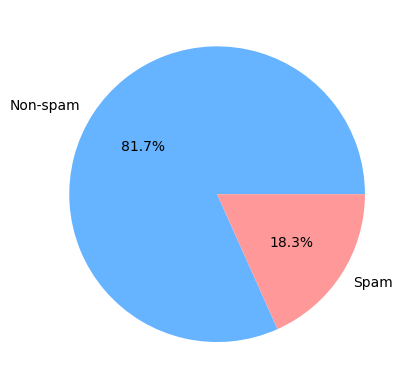

In [13]:
plt.pie(df['Label'].value_counts(),labels=["Non-spam","Spam"], autopct='%.1f%%', colors=['#66b3ff','#ff9999'])
plt.show()

In [14]:
df.drop(['S. No.'],axis=1,inplace=True)
df

,Message_body,Label
0,Rofl. Its true to its name,Non-Spam
1,The guy did some bitching but I acted like i'd...,Non-Spam
2,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,Will ü b going to esplanade fr home?,Non-Spam
4,This is the 2nd time we have tried 2 contact u...,Spam
...,...,...
120,7 wonders in My WORLD 7th You 6th Ur style 5th...,Non-Spam
121,Try to do something dear. You read something f...,Non-Spam
122,Sun ah... Thk mayb can if dun have anythin on....,Non-Spam
123,"SYMPTOMS when U are in love: ""1.U like listeni...",Non-Spam


In [15]:
df['Label']=df['Label'].map({'Spam':0,'Non-Spam':1})
df['Label']

0      1
1      1
2      1
3      1
4      0
      ..
120    1
121    1
122    1
123    1
124    1
Name: Label, Length: 1082, dtype: int64

In [16]:
text=df.Message_body
text

0                             Rofl. Its true to its name
1      The guy did some bitching but I acted like i'd...
2      Pity, * was in mood for that. So...any other s...
3                   Will ü b going to esplanade fr home?
4      This is the 2nd time we have tried 2 contact u...
                             ...                        
120    7 wonders in My WORLD 7th You 6th Ur style 5th...
121    Try to do something dear. You read something f...
122    Sun ah... Thk mayb can if dun have anythin on....
123    SYMPTOMS when U are in love: "1.U like listeni...
124    Great. Have a safe trip. Dont panic surrender ...
Name: Message_body, Length: 1082, dtype: object

In [17]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\FixLab\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\FixLab\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\FixLab\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\FixLab\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

TOKENIZATION

In [18]:
from nltk.tokenize import TweetTokenizer
tk=TweetTokenizer()
text=text.apply(lambda x:tk.tokenize(x)).apply(lambda x:' '.join(x))
text

0                            Rofl . Its true to its name
1      The guy did some bitching but I acted like i'd...
2      Pity , * was in mood for that . So ... any oth...
3                  Will ü b going to esplanade fr home ?
4      This is the 2nd time we have tried 2 contact u...
                             ...                        
120    7 wonders in My WORLD 7th You 6th Ur style 5th...
121    Try to do something dear . You read something ...
122    Sun ah ... Thk mayb can if dun have anythin on...
123    SYMPTOMS when U are in love : " 1 . U like lis...
124    Great . Have a safe trip . Dont panic surrende...
Name: Message_body, Length: 1082, dtype: object

REMOVAL OF SPECIAL CHARACTERS

In [19]:
text=text.str.replace('[^a-zA-Z0-9]',' ',regex=True)
text

0                            Rofl   Its true to its name
1      The guy did some bitching but I acted like i d...
2      Pity     was in mood for that   So     any oth...
3                  Will   b going to esplanade fr home  
4      This is the 2nd time we have tried 2 contact u...
                             ...                        
120    7 wonders in My WORLD 7th You 6th Ur style 5th...
121    Try to do something dear   You read something ...
122    Sun ah     Thk mayb can if dun have anythin on...
123    SYMPTOMS when U are in love     1   U like lis...
124    Great   Have a safe trip   Dont panic surrende...
Name: Message_body, Length: 1082, dtype: object

REMOVAL OF WORDS LESSER THAN 3 CHARACTERS

In [20]:
text=text.apply(lambda x:' '.join([w for w in tk.tokenize(x) if len(w)>=3]))
text

0                                 Rofl Its true its name
1      The guy did some bitching but acted like inter...
2           Pity was mood for that any other suggestions
3                              Will going esplanade home
4      This the 2nd time have tried contact have won ...
                             ...                        
120    wonders WORLD 7th You 6th style 5th smile 4th ...
121      Try something dear You read something for exams
122    Sun Thk mayb can dun have anythin Thk have boo...
123    SYMPTOMS when are love like listening songs ge...
124        Great Have safe trip Dont panic surrender all
Name: Message_body, Length: 1082, dtype: object

STEMMING

In [21]:
from nltk.stem import SnowballStemmer
ss=SnowballStemmer('english')
text=text.apply(lambda x:[ss.stem(i.lower()) for i in tk.tokenize(x)]).apply(lambda x:' '.join(x))
text

0                                   rofl it true it name
1      the guy did some bitch but act like interest b...
2               piti was mood for that ani other suggest
3                                  will go esplanad home
4      this the 2nd time have tri contact have won th...
                             ...                        
120    wonder world 7th you 6th style 5th smile 4th p...
121             tri someth dear you read someth for exam
122    sun thk mayb can dun have anythin thk have boo...
123    symptom when are love like listen song get sto...
124          great have safe trip dont panic surrend all
Name: Message_body, Length: 1082, dtype: object

REMOVAL OF STOPWORDS

In [22]:
from nltk.corpus import stopwords
sw=stopwords.words('english')
text=text.apply(lambda x:[j for j in tk.tokenize(x) if j not in sw]).apply(lambda x:' '.join(x))
text

0                                         rofl true name
1      guy bitch act like interest buy someth els nex...
2                                  piti mood ani suggest
3                                       go esplanad home
4      2nd time tri contact 750 pound prize claim eas...
                             ...                        
120    wonder world 7th 6th style 5th smile 4th perso...
121                     tri someth dear read someth exam
122    sun thk mayb dun anythin thk book lesson pilat...
123    symptom love like listen song get stop see nam...
124                   great safe trip dont panic surrend
Name: Message_body, Length: 1082, dtype: object

VECTORISATION

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
data=vec.fit_transform(text)
data

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 8924 stored elements and shape (1082, 2854)>

In [24]:
y=df['Label'].values
y

array([1, 1, 1, ..., 1, 1, 1])

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,y,test_size=0.30,random_state=42)

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
nav=MultinomialNB()
sv=SVC()
knn=KNeighborsClassifier(n_neighbors=7)
dtr=DecisionTreeClassifier(criterion='entropy')
lst=[nav,sv,knn,dtr]

In [27]:
for i in lst:
  print(i)
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  print("Acuuracy score is: ",accuracy_score(y_test,y_pred))

MultinomialNB()
Acuuracy score is:  0.9353846153846154
SVC()
Acuuracy score is:  0.9230769230769231
KNeighborsClassifier(n_neighbors=7)
Acuuracy score is:  0.8338461538461538
DecisionTreeClassifier(criterion='entropy')
Acuuracy score is:  0.9415384615384615


In [28]:
import pickle
pickle.dump(df,open('df.pkl','wb'))

In [ ]:
pickle.